In [1]:
import Pkg
Pkg.activate("../../")

  Activating project at `~/Documents/MPSTime.jl`


In [2]:
using JSON
using Plots
using StatsPlots
using Plots.PlotMeasures
using JLD2

In [3]:
pal = palette(:tab10);

# Load Python Results (CSDI, BRITS, CDREC)

In [4]:
cdrec_results = JSON.parsefile("Python/ipd_cdrec_results.json");
brits_results = JSON.parsefile("Python/ipd_brits_results.json");
csdi_results = JSON.parsefile("Python/ipd_csdi_results.json");

In [5]:
# per fold, per % missing
function extract_fold_pm(results::Dict, fold_idx::Int, pm::Int)
    """
    Extract errors for a given fold and percentage missing.
    Returns pooled errors across window locations, e.g., for 100 test instances,
    each evaluated for 5% missing data and 15 possible window locations,
    will return 1500 errors once pooled.
    """
    fold_marginalised = results["$fold_idx"]
    pm_marginalised = fold_marginalised["$pm"]
    window_iter_marginalised = [pm_marginalised["$i"] for i in 0:(length(pm_marginalised)-1)]
    # pool together results from all the window locs 
    window_pool = window_iter_marginalised[1]
    for i in 2:length(window_iter_marginalised)
        window_pool = vcat(window_pool, window_iter_marginalised[i])
    end
    return window_pool
end

extract_fold_pm (generic function with 1 method)

In [6]:
per_fold_5pt_csdi = mean([mean(extract_fold_pm(csdi_results, f, 5)) for f in 0:29])
per_fold_15pt_csdi = mean([mean(extract_fold_pm(csdi_results, f, 15)) for f in 0:29])
per_fold_25pt_csdi = mean([mean(extract_fold_pm(csdi_results, f, 25)) for f in 0:29])
per_fold_35pt_csdi = mean([mean(extract_fold_pm(csdi_results, f, 35)) for f in 0:29])
per_fold_45pt_csdi = mean([mean(extract_fold_pm(csdi_results, f, 45)) for f in 0:29])
per_fold_55pt_csdi = mean([mean(extract_fold_pm(csdi_results, f, 55)) for f in 0:29])
per_fold_65pt_csdi = mean([mean(extract_fold_pm(csdi_results, f, 65)) for f in 0:29])
per_fold_75pt_csdi = mean([mean(extract_fold_pm(csdi_results, f, 65)) for f in 0:29])


0.350941509928928

In [7]:
per_pm_mean_all_folds_csdi = [mean([mean(extract_fold_pm(csdi_results, f, pm)) for f in 0:29]) for pm in 5:10:95]
per_pm_std_err_all_folds_csdi = [std([mean(extract_fold_pm(csdi_results, f, pm)) for f in 0:29]) for pm in 5:10:95]/sqrt(30)
per_pm_95ci_all_folds_csdi = 1.96 * per_pm_std_err_all_folds_csdi

10-element Vector{Float64}:
 0.028475263525068566
 0.02636776586561802
 0.02578864462781078
 0.024488948656428554
 0.024251055168324657
 0.02428527711277031
 0.024956627047169343
 0.025623863927803654
 0.026339124761779825
 0.02741115304571906

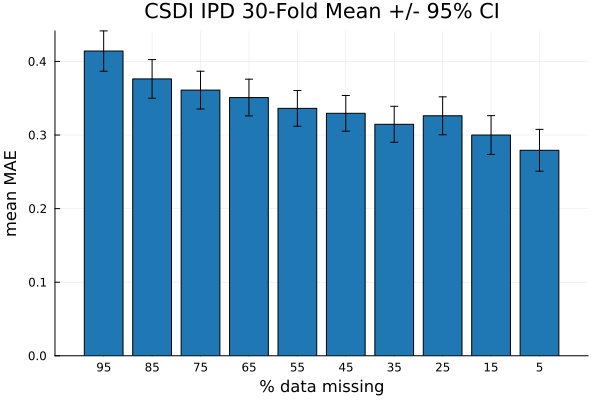

In [8]:
bar(per_pm_mean_all_folds_csdi, yerr=per_pm_95ci_all_folds_csdi, 
    xlabel="% data missing", label="", ylabel="mean MAE",
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    title="CSDI IPD 30-Fold Mean +/- 95% CI", c=pal[1])
xflip!(true)    
#savefig("ipd_csdi_only.svg")

In [9]:
per_pm_mean_all_folds_brits = [mean([mean(extract_fold_pm(brits_results, f, pm)) for f in 0:29]) for pm in 5:10:95]
per_pm_std_err_all_folds_brits = [std([mean(extract_fold_pm(brits_results, f, pm)) for f in 0:29]) for pm in 5:10:95]/sqrt(30)
per_pm_95ci_all_folds_brits = 1.96 * per_pm_std_err_all_folds_brits

10-element Vector{Float64}:
 0.034367327603021254
 0.04039930574745999
 0.033343896399873535
 0.03338817373852062
 0.03334981491483575
 0.034222102418494244
 0.03713287306282179
 0.041694907630309704
 0.04546307023840116
 0.04652229316111939

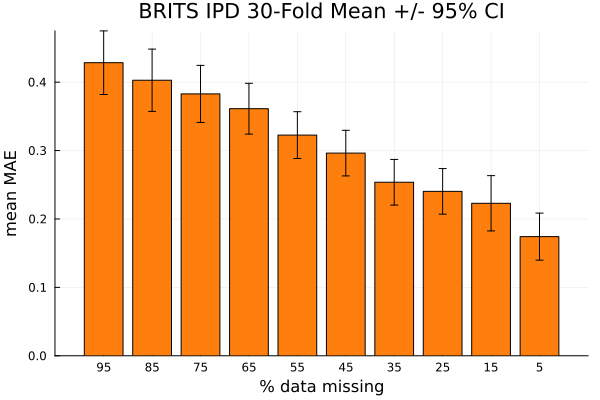

In [10]:
bar(per_pm_mean_all_folds_brits, yerr=per_pm_95ci_all_folds_brits, 
    xlabel="% data missing", label="", ylabel="mean MAE",
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    title="BRITS IPD 30-Fold Mean +/- 95% CI", c=pal[2])
xflip!(true)    
#savefig("ipd_brits_only.svg")

In [11]:
per_pm_mean_all_folds_cdrec = [mean([mean(extract_fold_pm(cdrec_results, f, pm)) for f in 0:29]) for pm in 5:10:95]
per_pm_std_err_all_folds_cdrec = [std([mean(extract_fold_pm(cdrec_results, f, pm)) for f in 0:29]) for pm in 5:10:95]/sqrt(30)
per_pm_95ci_all_folds_cdrec = 1.96 * per_pm_std_err_all_folds_cdrec

10-element Vector{Float64}:
 0.0013386887685662488
 0.00896030971673855
 0.013732127812377972
 0.007233997814106386
 0.012837374716578023
 0.017841779824457345
 0.02795159516984981
 0.03918544585909274
 0.04506222774542572
 0.055040173315444106

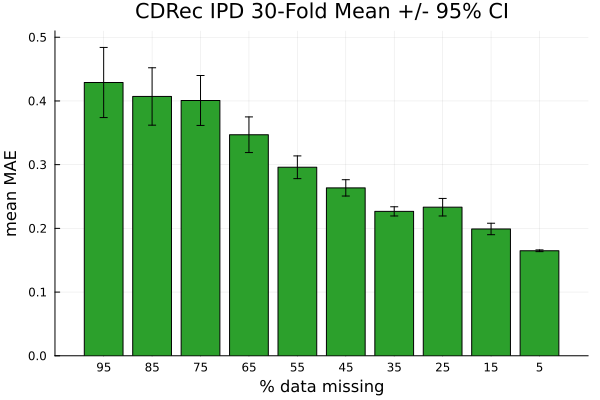

In [12]:
bar(per_pm_mean_all_folds_cdrec, yerr=per_pm_95ci_all_folds_cdrec, 
    xlabel="% data missing", label="", ylabel="mean MAE",
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    title="CDRec IPD 30-Fold Mean +/- 95% CI", c=pal[3],
    ylims=(0, 0.51))
xflip!(true)    
#savefig("ipd_cdrec_only.svg")

Combined 

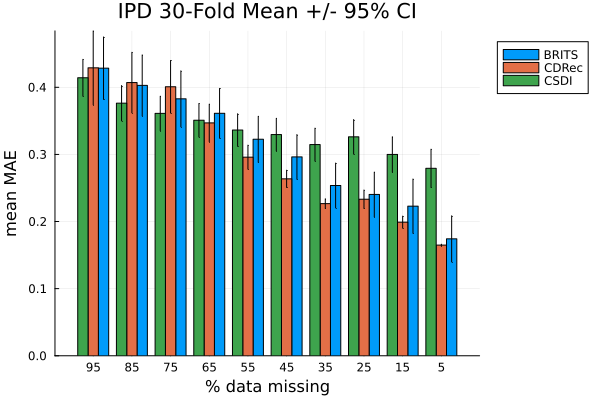

In [13]:
groupedbar([per_pm_mean_all_folds_brits per_pm_mean_all_folds_cdrec per_pm_mean_all_folds_csdi],
    yerr=[per_pm_95ci_all_folds_brits per_pm_95ci_all_folds_cdrec per_pm_95ci_all_folds_csdi],
    markersize=0,
    legend=:outertopright, 
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    label=["BRITS" "CDRec" "CSDI"], 
    title="IPD 30-Fold Mean +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean MAE")
xflip!(true)
#savefig("ipd_combined_impute.svg")

----

# MPS

In [14]:
f = jldopen("Julia/IPD_ImputationFinalResults_30Fold.jld2", "r");
mac_results_mps = read(f, "mps_results")
mac_results_nn = read(f, "nn_results")
close(f)

In [15]:
instances = length(mac_results_mps[5][1])
mps_per_pm_30fold_mean = [mean([mean([mean(mac_results_mps[pm][f][inst]) for inst in 1:instances]) for f in 1:30]) for pm in 1:10]
nn_per_pm_30fold_mean = [mean([mean([mean(mac_results_nn[pm][f][inst]) for inst in 1:instances]) for f in 1:30]) for pm in 1:10]
mps_per_pm_30fold_std_err = ([std([mean([mean(mac_results_mps[pm][f][inst]) for inst in 1:instances]) for f in 1:30]) for pm in 1:10]/sqrt(30))
nn_per_pm_30fold_std_err = ([std([mean([mean(mac_results_nn[pm][f][inst]) for inst in 1:instances]) for f in 1:30]) for pm in 1:10]/sqrt(30))
mps_per_pm_30fold_95ci = 1.96 * mps_per_pm_30fold_std_err;
nn_per_pm_30fold_95ci = 1.96 * nn_per_pm_30fold_std_err;

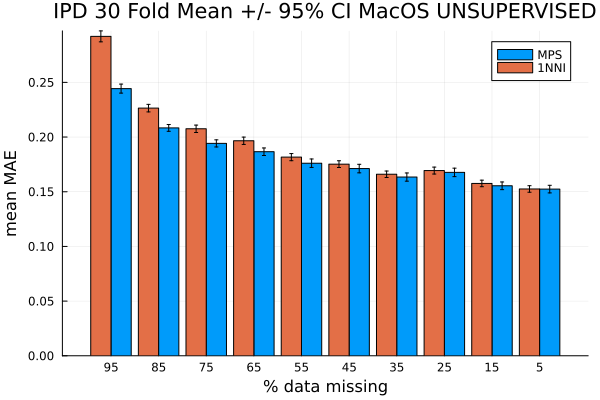

In [16]:
groupedbar([mps_per_pm_30fold_mean nn_per_pm_30fold_mean],
    yerr=[mps_per_pm_30fold_95ci nn_per_pm_30fold_95ci],
    markersize=2, 
    legend=:topright,
    bar_width=0.85,
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    label=["MPS" "1NNI"], 
    title="IPD 30 Fold Mean +/- 95% CI MacOS UNSUPERVISED",
    xlabel="% data missing",
    ylabel="mean MAE")
xflip!(true)
#savefig("ipd_30fold_mps_vs_nnNew.svg")

In [17]:
group_colours = [pal[4] pal[2] pal[10] pal[3] pal[5]]

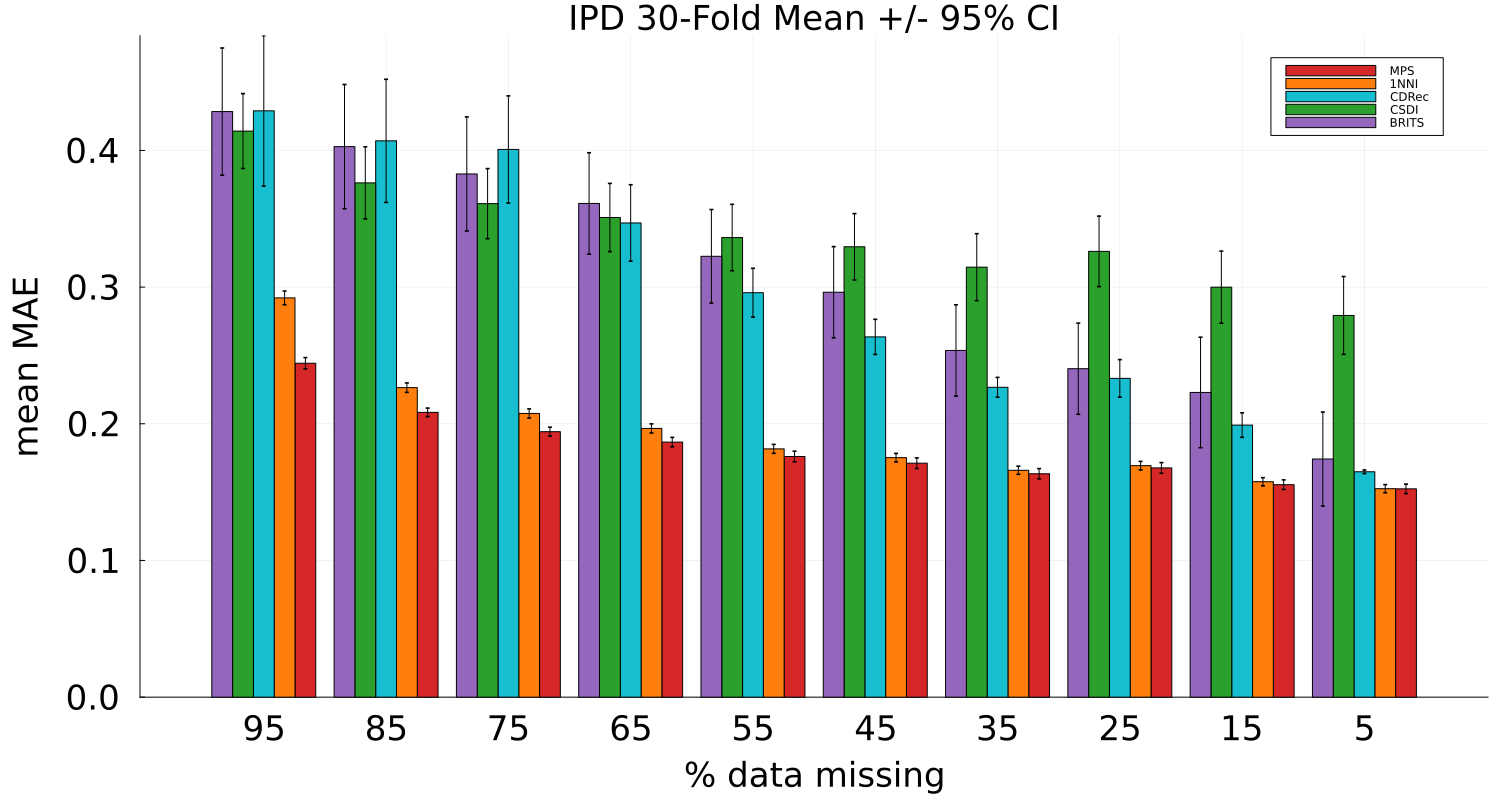

In [18]:
fstyle = font("sans-serif", 23)
groupedbar([mps_per_pm_30fold_mean nn_per_pm_30fold_mean per_pm_mean_all_folds_cdrec per_pm_mean_all_folds_csdi per_pm_mean_all_folds_brits],
    yerr=[mps_per_pm_30fold_95ci nn_per_pm_30fold_95ci per_pm_95ci_all_folds_cdrec per_pm_95ci_all_folds_csdi per_pm_95ci_all_folds_brits],
    markersize=2,
    bar_width=0.85,
    legend=:topright, 
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    label=["MPS" "1NNI" "CDRec" "CSDI" "BRITS"], 
    c=group_colours,
    title="IPD 30-Fold Mean +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean MAE",
    xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,size=(1500, 800),
    bottom_margin=10mm,
    left_margin=10mm)
xflip!(true)
#savefig("IPD_results_final.svg")

# BRITSI

In [19]:
ipd_britsi = JSON.parsefile("Python/IPD_britsi.json");
ipd_britsi_means = float.(ipd_britsi["means"])
ipd_britsi_stds = float.(ipd_britsi["stds"])
ipd_britsi_95cis = 1.96/sqrt(30) * ipd_britsi_stds

10-element Vector{Float64}:
 0.0027779928899221065
 0.005313687729100129
 0.005112035029031596
 0.005663931811414459
 0.011372332316537065
 0.01576624452620481
 0.023430251282692067
 0.02890989160008057
 0.033498452286444144
 0.038991714213829576

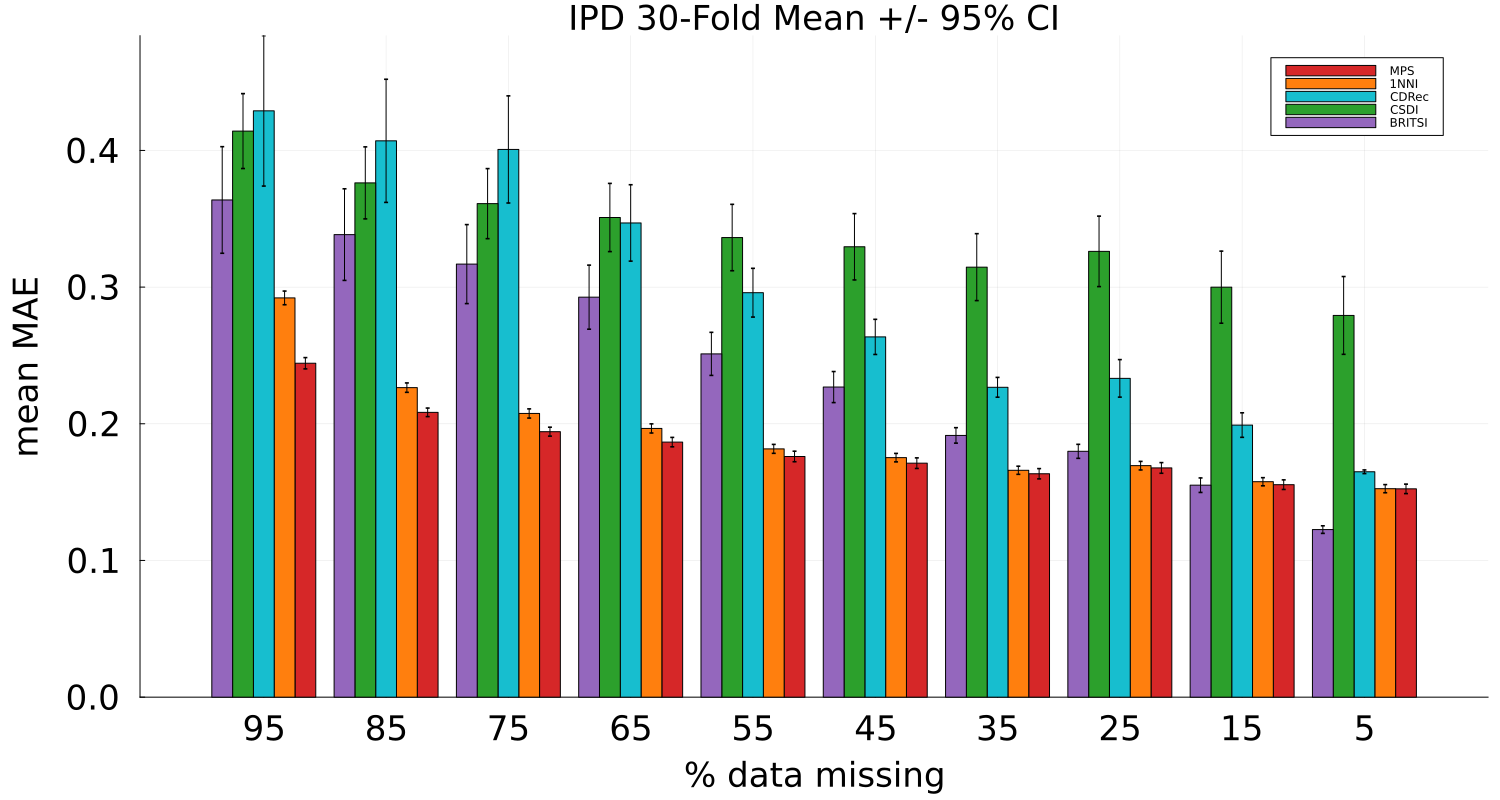

In [20]:
fstyle = font("sans-serif", 23)
groupedbar([mps_per_pm_30fold_mean nn_per_pm_30fold_mean per_pm_mean_all_folds_cdrec per_pm_mean_all_folds_csdi ipd_britsi_means],
    yerr=[mps_per_pm_30fold_95ci nn_per_pm_30fold_95ci per_pm_95ci_all_folds_cdrec per_pm_95ci_all_folds_csdi ipd_britsi_95cis],
    markersize=2,
    bar_width=0.85,
    legend=:topright, 
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    label=["MPS" "1NNI" "CDRec" "CSDI" "BRITSI"], 
    c=group_colours,
    title="IPD 30-Fold Mean +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean MAE",
    xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,size=(1500, 800),
    bottom_margin=10mm,
    left_margin=10mm)
xflip!(true)
#savefig("IPD_results_final_wBRITSI.svg")

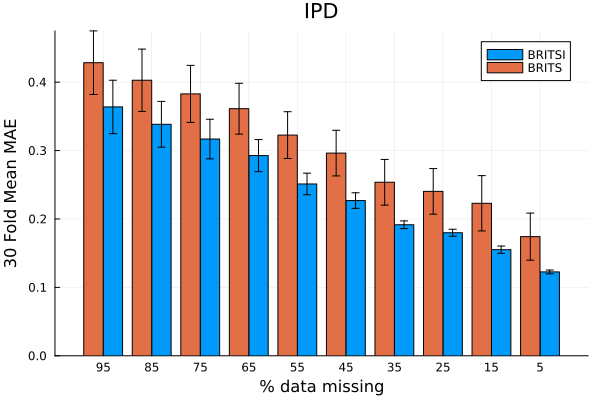

In [21]:
groupedbar([ipd_britsi_means per_pm_mean_all_folds_brits], 
    yerr=[ipd_britsi_95cis per_pm_95ci_all_folds_brits], 
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    label=["BRITSI" "BRITS"],
    xlabel="% data missing",
    ylabel="30 Fold Mean MAE",
    legend=:topright,
    title="IPD")
xflip!(true)
#savefig("ipd_brits_v_britsi.svg")

# Hyperparameter Optimized MPS Results

In [22]:
hyperparm_opt_mps_results = jldopen("IPD_hyperopt_res.jld2", "r");
pms = read(hyperparm_opt_mps_results, "pms")
mps_per_pm_30fold_mean_hopt = read(hyperparm_opt_mps_results, "mmae_by_pm")
mps_per_pm_30fold_std_hopt = read(hyperparm_opt_mps_results, "std_by_pm")[:, 1]

10-element Vector{Float64}:
 0.010637239581746125
 0.010527793303032206
 0.012237213084041325
 0.01242152008623419
 0.013338230261641538
 0.013398022732320426
 0.012711868020599317
 0.012927730683968177
 0.012748076517512861
 0.018321258730117366

In [23]:
mps_per_pm_30fold_std_hopt * 1.96/sqrt(30)

10-element Vector{Float64}:
 0.003806487298092658
 0.0037673224502440725
 0.004379030462789506
 0.004444983876492868
 0.004773024399779414
 0.004794420860619813
 0.004548883550435051
 0.004626129012467893
 0.004561840594649881
 0.006556178236404174

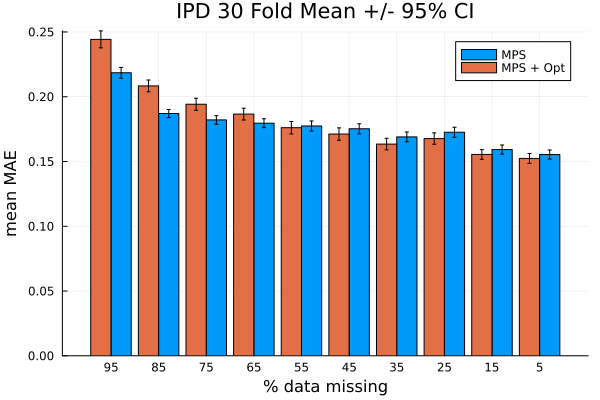

In [24]:
# side by side comparison of MPS with and w/o hyperparameter optimization
groupedbar([mps_per_pm_30fold_mean_hopt mps_per_pm_30fold_mean],
    yerr=[mps_per_pm_30fold_95ci mps_per_pm_30fold_std_hopt * 1.96/sqrt(30)],
    markersize=2, 
    legend=:topright,
    bar_width=0.85,
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    label=["MPS" "MPS + Opt"], 
    title="IPD 30 Fold Mean +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean MAE")
xflip!(true)
#savefig("mps_opt_no_opt_ipd.svg")

In [25]:
pm = collect(5:10:95);

In [26]:
ipd_results = Dict()
res_mps = Dict()
res_mps["pm"] = pm 
res_mps["means"] = mps_per_pm_30fold_mean
res_mps["std_errors"] = mps_per_pm_30fold_std_err
res_nn = Dict()
res_nn["pm"] = pm 
res_nn["means"] = nn_per_pm_30fold_mean
res_nn["std_errors"] = nn_per_pm_30fold_std_err
res_csdi = Dict()
res_csdi["pm"] = pm 
res_csdi["means"] = per_pm_mean_all_folds_csdi
res_csdi["std_errors"] = per_pm_std_err_all_folds_csdi
res_brits = Dict()
res_brits["pm"] = pm 
res_brits["means"] = per_pm_mean_all_folds_brits
res_brits["std_errors"] = per_pm_std_err_all_folds_brits
res_cdrec = Dict()
res_cdrec["pm"] = pm 
res_cdrec["means"] = per_pm_mean_all_folds_cdrec
res_cdrec["std_errors"] = per_pm_std_err_all_folds_cdrec
ipd_results["mps"] = res_mps
ipd_results["nn"] = res_nn
ipd_results["brits"] = res_brits
ipd_results["cdrec"] = res_cdrec
ipd_results["csdi"] = res_csdi

Dict{Any, Any} with 3 entries:
  "std_errors" => [0.0145282, 0.0134529, 0.0131575, 0.0124944, 0.012373, 0.0123…
  "pm"         => [5, 15, 25, 35, 45, 55, 65, 75, 85, 95]
  "means"      => [0.279277, 0.299984, 0.326162, 0.314607, 0.329521, 0.336275, …

# Data Driven Encoding Work

In [ ]:
# ipd_data_driven_f = jldopen("data_driven_encoding/IPD_ImputationFinalResults_30Fold_data_driven.jld2");
# ipd_data_driven_mps = read(ipd_data_driven_f, "mps_results")
# ipd_data_driven_nn = read(ipd_data_driven_f, "nn_results");

In [ ]:
# per_pm_30_fold_mean_mps_dd = [mean([mean(vcat([ipd_data_driven_mps[pm][fold][i] for i in 1:1029]...)) for fold in 1:30]) for pm in 1:10]
# per_pm_30_fold_std_mps_dd = [std([mean(vcat([ipd_data_driven_mps[pm][fold][i] for i in 1:1029]...)) for fold in 1:30]) for pm in 1:10]
# per_pm_30_fold_mean_nn_dd = [mean([mean(vcat([ipd_data_driven_nn[pm][fold][i] for i in 1:1029]...)) for fold in 1:30]) for pm in 1:10]
# per_pm_30_fold_std_nn_dd = [std([mean(vcat([ipd_data_driven_nn[pm][fold][i] for i in 1:1029]...)) for fold in 1:30]) for pm in 1:10]
# # standard errors 
# per_pm_30_fold_standard_error_mps_dd = per_pm_30_fold_std_mps_dd/sqrt(30)
# per_pm_30_fold_standard_error_nn_dd = per_pm_30_fold_std_nn_dd/sqrt(30)
# # 95 ci 
# per_pm_30_fold_95ci_mps_dd = 1.96 * per_pm_30_fold_standard_error_mps_dd
# per_pm_30_fold_95ci_nn_dd = 1.96 * per_pm_30_fold_standard_error_nn_dd

10-element Vector{Float64}:
 0.002980686689408044
 0.002977390190813625
 0.003142566358543097
 0.002959261456753772
 0.0030877479612509795
 0.003275211374122146
 0.003346053163606393
 0.00337177651498566
 0.003453001524199971
 0.0050002708616136895

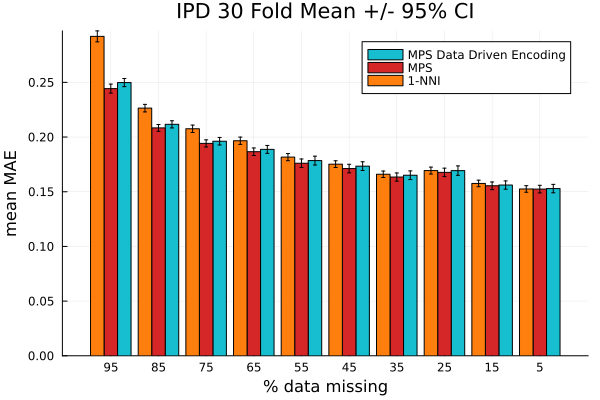

In [ ]:
# groupedbar([per_pm_30_fold_mean_mps_dd mps_per_pm_30fold_mean per_pm_30_fold_mean_nn_dd],
#     yerr=[per_pm_30_fold_95ci_mps_dd mps_per_pm_30fold_95ci per_pm_30_fold_95ci_nn_dd],
#     c=[pal[10] pal[4] pal[2]],
#     labels=["MPS Data Driven Encoding" "MPS" "1-NNI"],
#     legend=:topright,
#     markersize=2,
#     bar_width=0.85,
#     xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#     ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
#     xlabel="% data missing",
#     ylabel="mean MAE",
#     title="IPD 30 Fold Mean +/- 95% CI")
# xflip!(true)
# #savefig("IPD_result_data_driven_vs_regular.svg")

# MPS Hyperparam Opt Results Feb 21

In [27]:
mps_ho_10fold = jldopen("Julia/IPD_hyperopt_res_10fold.jld2")
pms_mps_ho_10fold = read(mps_ho_10fold, "pms")
mnae_by_pm_mps_10fold = read(mps_ho_10fold, "mmae_by_pm")
std_by_pm_mps_10fold = read(mps_ho_10fold, "std_by_pm")[:, 1]

10-element Vector{Float64}:
 0.012297747243783484
 0.012720711464584354
 0.013247442319037562
 0.012710738286938656
 0.01343798005621788
 0.013745701934222756
 0.012771259612583925
 0.012720205438460083
 0.01202279095638136
 0.015535292422950165

In [28]:
mps_ho_50fold = jldopen("Julia/IPD_hyperopt_res_50fold.jld2")
pms_mps_ho_50fold = read(mps_ho_50fold, "pms")
mnae_by_pm_mps_50fold = read(mps_ho_50fold, "mmae_by_pm_2")
std_by_pm_mps_50fold = read(mps_ho_50fold, "std_by_pm_2")[:, 1]

10-element Vector{Float64}:
 0.009850869808626333
 0.009411297727248788
 0.01054103280850033
 0.010305027573908158
 0.010781493516920893
 0.011163984449287347
 0.010531312062518595
 0.010386229926525136
 0.009946413211339022
 0.013595458823720603

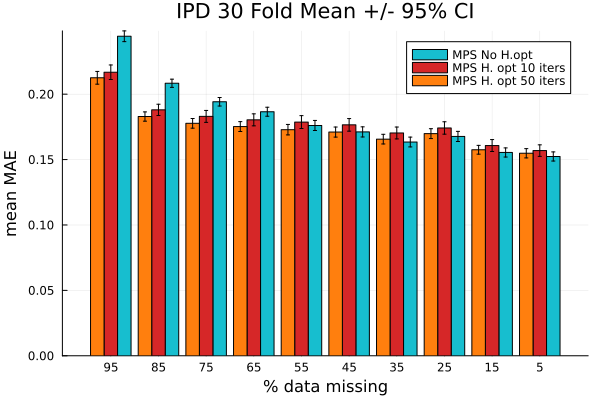

In [29]:
groupedbar([mps_per_pm_30fold_mean mnae_by_pm_mps_10fold mnae_by_pm_mps_50fold],
    yerr=[mps_per_pm_30fold_95ci std_by_pm_mps_10fold * 1.96/sqrt(30) std_by_pm_mps_50fold * 1.96/sqrt(30)],
    c=[pal[10] pal[4] pal[2]],
    labels=["MPS No H.opt" "MPS H. opt 10 iters" "MPS H. opt 50 iters"],
    legend=:topright,
    markersize=2,
    bar_width=0.85,
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    xlabel="% data missing",
    ylabel="mean MAE",
    title="IPD 30 Fold Mean +/- 95% CI")
xflip!(true)
#savefig("ipd_mps_hopt_10fold_50fold.svg")

# Load new MPS results with hyperparam opt March 7

In [30]:
mps_hopt_new = jldopen("IPD_josh2.jld2", "r")
pms_hopt_new = read(mps_hopt_new, "pms")
means_hopt_new = read(mps_hopt_new, "mmae_by_pms")
std_hopt_new = read(mps_hopt_new, "std_by_pms")[:, 1];

In [31]:
mps_per_pm_30fold_mean_new = means_hopt_new
mps_per_pm_30fold_95ci_new = std_hopt_new * 1.96/sqrt(30)

10-element Vector{Float64}:
 0.003057316131762612
 0.003173566261122605
 0.003667813952121877
 0.0035994044031826054
 0.003785742399982591
 0.003840069973843151
 0.0038546493527655736
 0.003783552452314957
 0.0036760542019175324
 0.004898300821504385

In [32]:
mps_per_pm_30fold_mean_new

10-element Vector{Float64}:
 0.15351626265314197
 0.15539841019423914
 0.16707617703838312
 0.16263307132009477
 0.16724214623424022
 0.16863944532807504
 0.17144075793323166
 0.1747792486545142
 0.18058926737732484
 0.21292055936047008

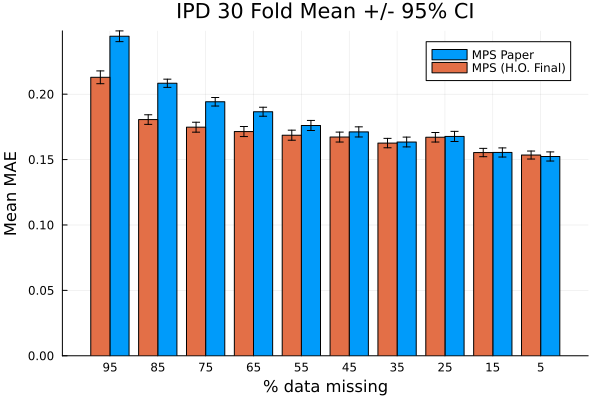

In [33]:
groupedbar([mps_per_pm_30fold_mean mps_per_pm_30fold_mean_new], 
    yerr=[mps_per_pm_30fold_95ci mps_per_pm_30fold_95ci_new],
    legend=:topright, 
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    label=["MPS Paper" "MPS (H.O. Final)"], 
    title="IPD 30 Fold Mean +/- 95% CI",
    xlabel="% data missing",
    ylabel="Mean MAE"
    )
xflip!(true)

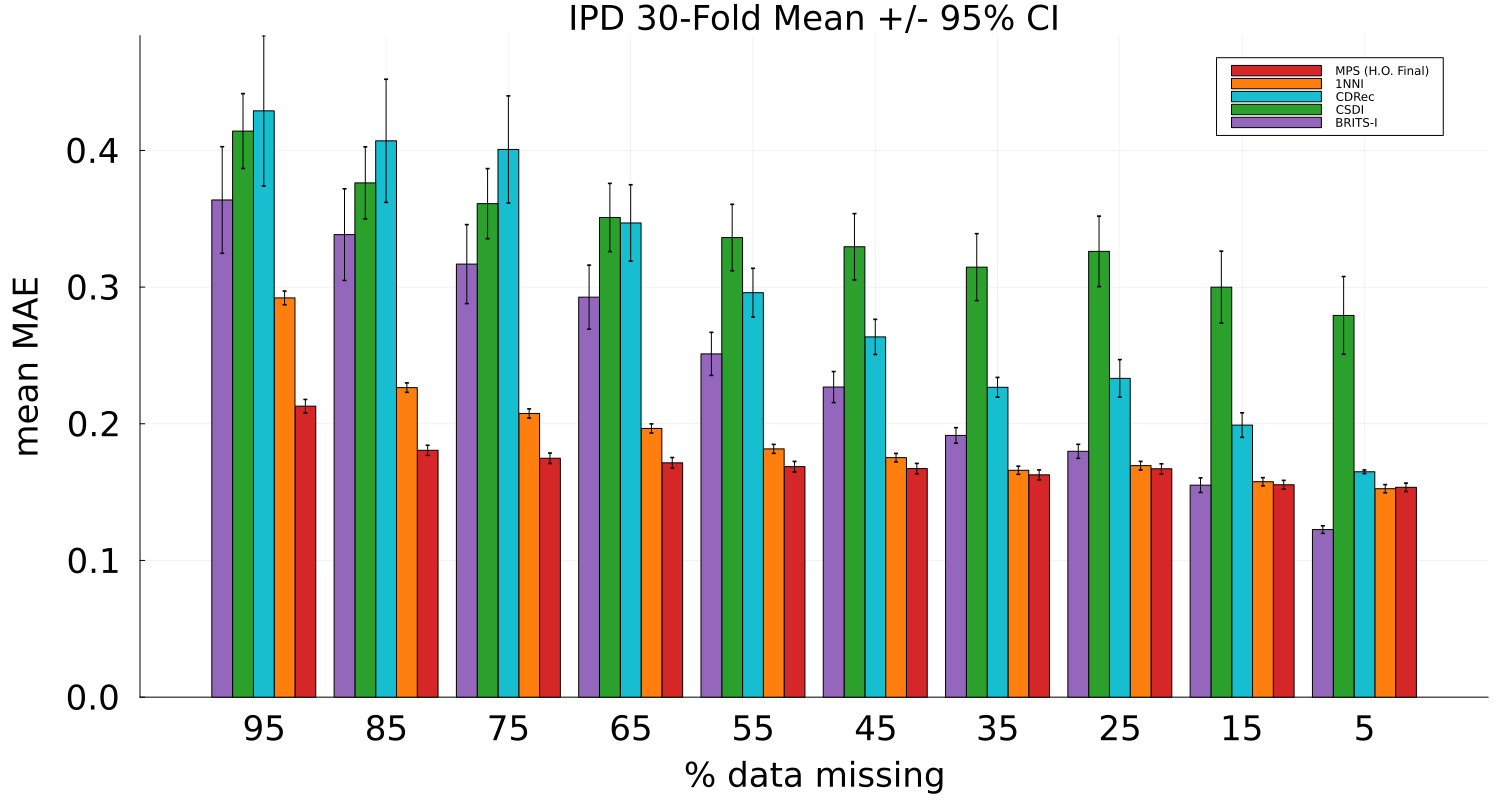

In [34]:
fstyle = font("sans-serif", 23)
groupedbar([mps_per_pm_30fold_mean_new nn_per_pm_30fold_mean per_pm_mean_all_folds_cdrec per_pm_mean_all_folds_csdi ipd_britsi_means],
    yerr=[mps_per_pm_30fold_95ci_new nn_per_pm_30fold_95ci per_pm_95ci_all_folds_cdrec per_pm_95ci_all_folds_csdi ipd_britsi_95cis],
    markersize=2,
    bar_width=0.85,
    legend=:topright, 
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    label=["MPS (H.O. Final)" "1NNI" "CDRec" "CSDI" "BRITS-I"], 
    c=group_colours,
    title="IPD 30-Fold Mean +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean MAE",
    xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,size=(1500, 800),
    bottom_margin=10mm,
    left_margin=10mm)
xflip!(true)
#savefig("IPD_results_final_wBRITSI_and_MPS_hyperopt.svg")

# Load final MPS results with hyperparam opt March 24

In [35]:
mps_hyper_final = jldopen("IPD_250.jld2", "r")
mps_hyper_final_pms = read(mps_hyper_final, "pms")
mps_hyper_final_means = read(mps_hyper_final, "mmae_by_pms")
mps_hyper_final_stds = read(mps_hyper_final, "std_by_pms")[:, 1];
mps_hyper_final_95cis = 1.96/sqrt(30) * mps_hyper_final_stds

10-element Vector{Float64}:
 0.0036756187856410386
 0.003709097593025236
 0.004308891657290766
 0.004202228181175258
 0.004268356812141696
 0.004386152385921038
 0.0039159071740641985
 0.0037214881817568338
 0.003743503568039355
 0.005652562312541226

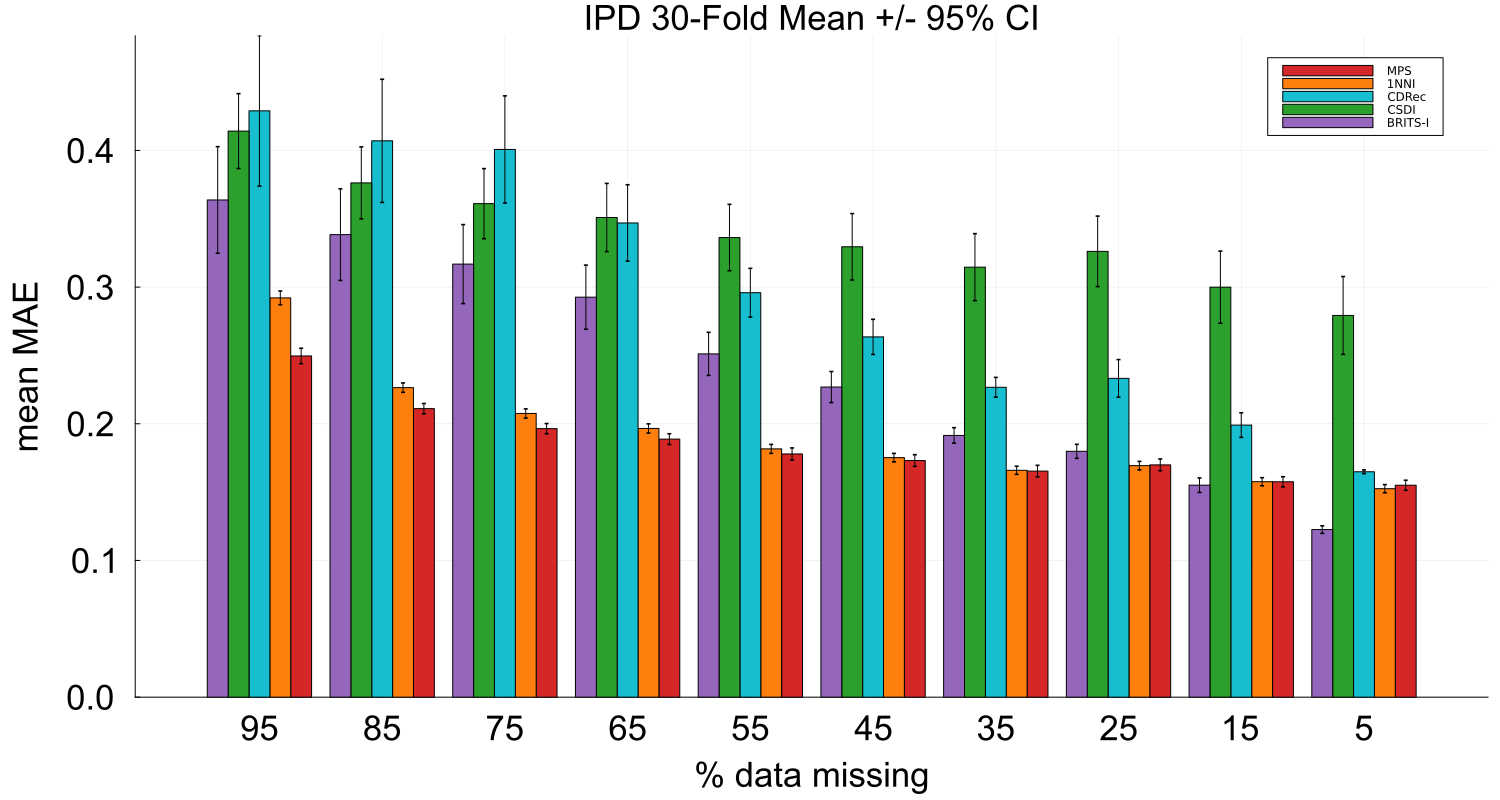

In [36]:
fstyle = font("Arial", 23)
groupedbar([mps_hyper_final_means nn_per_pm_30fold_mean per_pm_mean_all_folds_cdrec per_pm_mean_all_folds_csdi ipd_britsi_means],
    yerr=[mps_hyper_final_95cis nn_per_pm_30fold_95ci per_pm_95ci_all_folds_cdrec per_pm_95ci_all_folds_csdi ipd_britsi_95cis],
    markersize=2,
    bar_width=0.85,
    legend=:topright, 
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    label=["MPS" "1NNI" "CDRec" "CSDI" "BRITS-I"], 
    c=group_colours,
    title="IPD 30-Fold Mean +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean MAE",
    xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,size=(1500, 800),
    bottom_margin=10mm,
    left_margin=10mm)
xflip!(true)
#savefig("IPD_imputation_paper.svg")